MovieWriter imagemagick unavailable; using Pillow instead.


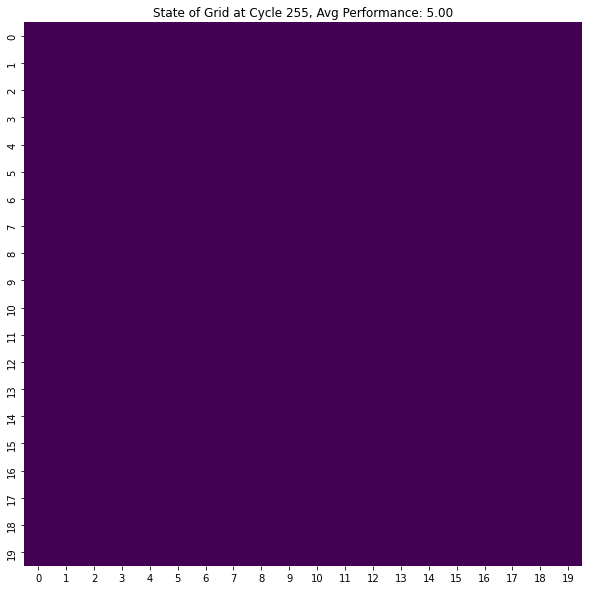

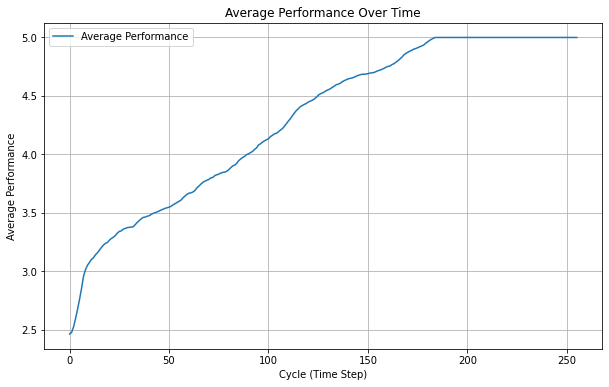

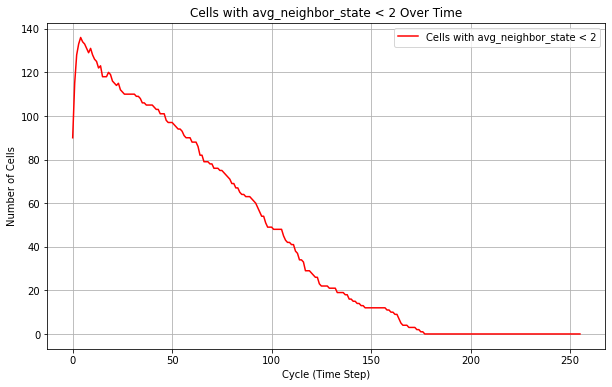

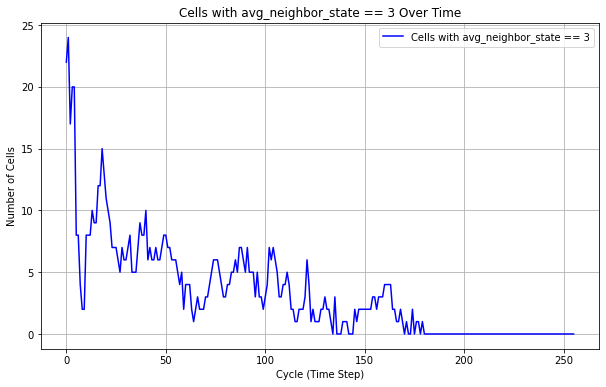

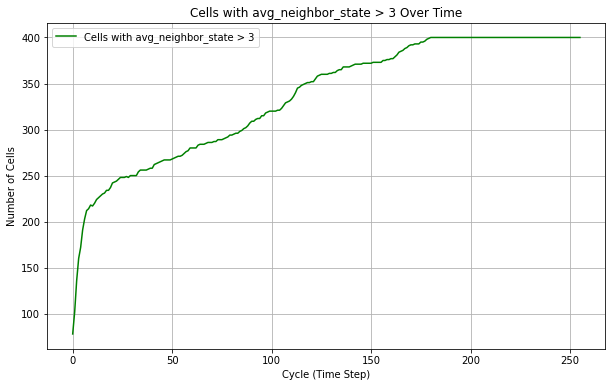

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Define the grid size
grid_size = 20

# Initialize the grid with random performance states (0-5)
grid = np.random.randint(0, 6, (grid_size, grid_size))

# Define the number of simulation cycles
num_cycles = 256

# Define a function to calculate the next state of the grid
def update_grid(grid, history):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbors.append(grid[ni, nj])
            avg_neighbor_state = np.mean(neighbors)
            
            # Leadership influence
            if avg_neighbor_state > 3:
                new_grid[i, j] = min(grid[i, j] + 1, 5)
            # Team dynamics
            elif avg_neighbor_state < 2:
                new_grid[i, j] = max(grid[i, j] - 1, 0)
            # Random rewards
            elif np.random.rand() < 0.1:
                new_grid[i, j] = min(grid[i, j] + 1, 5)
            # Sustained performance boost
            if len(history) >= 3:
                if history[-1][i, j] > history[-2][i, j] and history[-2][i, j] > history[-3][i, j]:
                    new_grid[i, j] = min(grid[i, j] + 1, 5)
    return new_grid

# Function to run the simulation and log performance metrics
def run_simulation(grid, num_cycles):
    history = [grid.copy()]
    metrics = []  # To log metrics at each time step
    avg_neighbors_less_than_2 = []  # To track team dynamics with avg_neighbor_state < 2
    avg_neighbors_equal_3 = []  # To track team dynamics with avg_neighbor_state == 3
    avg_neighbors_greater_than_3 = []  # To track team dynamics with avg_neighbor_state > 3
    
    for cycle in range(num_cycles):
        grid = update_grid(grid, history)
        history.append(grid.copy())
        
        # Log the current state of the grid and any metrics of interest
        avg_performance = np.mean(grid)
        metrics.append(avg_performance)
        
        # Count cells affected by different team dynamics
        count_less_than_2 = 0
        count_equal_3 = 0
        count_greater_than_3 = 0
        for i in range(grid_size):
            for j in range(grid_size):
                neighbors = []
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if di == 0 and dj == 0:
                            continue
                        ni, nj = i + di, j + dj
                        if 0 <= ni < grid_size and 0 <= nj < grid_size:
                            neighbors.append(grid[ni, nj])
                avg_neighbor_state = np.mean(neighbors)
                if avg_neighbor_state < 2:
                    count_less_than_2 += 1
                elif avg_neighbor_state == 3:
                    count_equal_3 += 1
                elif avg_neighbor_state > 3:
                    count_greater_than_3 += 1
        avg_neighbors_less_than_2.append(count_less_than_2)
        avg_neighbors_equal_3.append(count_equal_3)
        avg_neighbors_greater_than_3.append(count_greater_than_3)
        
    return history, metrics, avg_neighbors_less_than_2, avg_neighbors_equal_3, avg_neighbors_greater_than_3

# Run the simulation
history, metrics, avg_neighbors_less_than_2, avg_neighbors_equal_3, avg_neighbors_greater_than_3 = run_simulation(grid, num_cycles)

# Function to animate the grid
def animate(i):
    ax.clear()
    sns.heatmap(history[i], annot=False, fmt="d", cmap='viridis', cbar=False, ax=ax)
    ax.set_title(f'State of Grid at Cycle {i}, Avg Performance: {metrics[i]:.2f}')

# Plotting the animation
fig, ax = plt.subplots(figsize=(10, 10))
ani = FuncAnimation(fig, animate, frames=num_cycles, repeat=False)

# Save the animation as a GIF file using imagemagick writer
ani.save('animation.gif', writer='imagemagick')

plt.show()

# Plot the average performance over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_cycles), metrics, label='Average Performance')
plt.xlabel('Cycle (Time Step)')
plt.ylabel('Average Performance')
plt.title('Average Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the count of cells with avg_neighbor_state < 2 over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_cycles), avg_neighbors_less_than_2, label='Cells with avg_neighbor_state < 2', color='red')
plt.xlabel('Cycle (Time Step)')
plt.ylabel('Number of Cells')
plt.title('Cells with avg_neighbor_state < 2 Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the count of cells with avg_neighbor_state == 3 over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_cycles), avg_neighbors_equal_3, label='Cells with avg_neighbor_state == 3', color='blue')
plt.xlabel('Cycle (Time Step)')
plt.ylabel('Number of Cells')
plt.title('Cells with avg_neighbor_state == 3 Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the count of cells with avg_neighbor_state > 3 over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_cycles), avg_neighbors_greater_than_3, label='Cells with avg_neighbor_state > 3', color='green')
plt.xlabel('Cycle (Time Step)')
plt.ylabel('Number of Cells')
plt.title('Cells with avg_neighbor_state > 3 Over Time')
plt.legend()
plt.grid(True)
plt.show()
